# 2021/6/22 最適化 - 最急降下法

###### 最急降下法を実装してみる

In [1]:
import numpy as np

class GradientDescent:
    def __init__(self,f,df,eta=0.05,eps=1e-06):
        self.f=f #関数を渡す
        self.df=df #1次導関数
        self.eta=eta #学習率
        self.eps=eps #ストップ判定
        
    def solve(self,x):
        result_list=[] 
        while True: 
            result_list.append(x) #途中経過を格納
            x=x-df(x)*self.eta #更新式により更新
            if np.linalg.norm(df(x))<=self.eps: #ループ終了条件
                result_list.append(x)
                break
        self.path_=np.array(result_list) #途中経過を格納
        self.x_=x #最終結果を格納
        self.grad_=df(x) #勾配を格納

In [2]:
#関数定義
def f(xy):
    x=xy[0]
    y=xy[1]
    return x**3+y**3-9*x*y+27

#1次導関数定義
def df(xy):
    x=xy[0]
    y=xy[1]
    return np.array([3*x**2-9*y,3*y**2-9*x])

gd=GradientDescent(f,df)
initial_x=np.array([10,8]) #初期条件設定
gd.solve(initial_x)

#勾配出力
gd.grad_

array([-3.92449873e-07, -3.92449873e-07])

In [3]:
#最終結果出力
gd.x_

array([2.99999996, 2.99999996])

In [4]:
#途中経過
gd.path_[:5]

array([[10.        ,  8.        ],
       [-1.4       ,  2.9       ],
       [-0.389     ,  1.0085    ],
       [ 0.04212685,  0.68088916],
       [ 0.34826077,  0.63030474]])

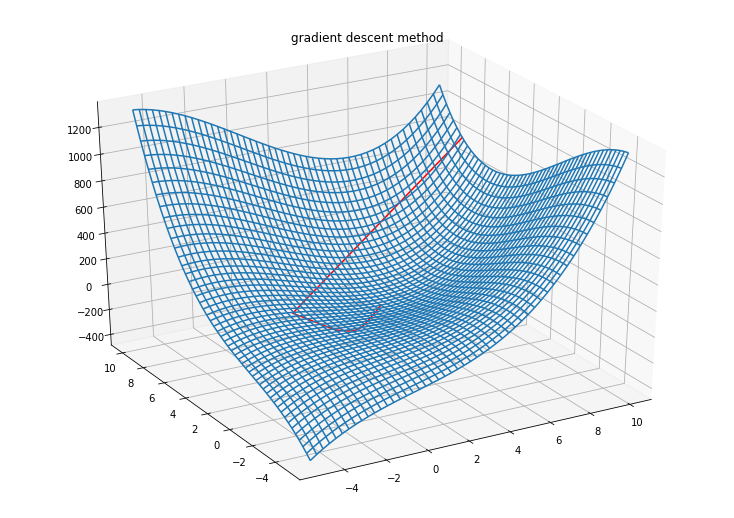

In [5]:
#可視化
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(10,7))
ax=Axes3D(fig,azim=-120)

x_curve=np.linspace(-5,10,50)
y_curve=np.linspace(-5,10,50)
X_curve,Y_curve=np.meshgrid(x_curve,y_curve)
Z_curve=f(np.array([X_curve,Y_curve]))

ax.plot_wireframe(X_curve,Y_curve,Z_curve)
ax.set_title('gradient descent method')

#計算結果出力
z_path=f(np.array([gd.path_[:,0],gd.path_[:,1]]))
ax.plot3D(gd.path_[:,0],gd.path_[:,1],z_path,c='r')

40


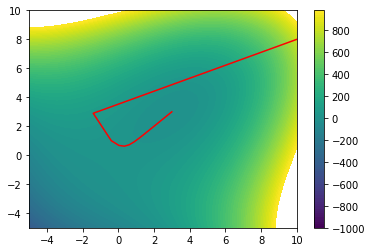

In [6]:
#可視化
levels=range(-1000,1000,20)
plt.contourf(X_curve,Y_curve,Z_curve,levels=levels)
plt.colorbar()

#計算結果出力
plt.plot(gd.path_[:,0],gd.path_[:,1],c='r')

#計算回数を出力
print(len(gd.path_))